## Does Dr Horrible's Sing-Along Blog Have the Highest Trope Density? ##

A friend of mine once suggested that Dr Horrible's Sing-Along Blog has the highest trope density of any T.V. series or movie. "Just look at how long the TV Tropes page is and it only runs for about 40 minutes!"

Eventually, this kept nagging me to the point that the below got written.

A few points of order before proceeding:
- Analysis is considering only items which have a running time in minutes
- Total Running Time is whatever we get out of IMDB or similar in minutes
- Total Tropes is the count of tropes in the trope listing from the appropriate TV Tropes page
- Trope Density is defined as (Total Tropes)/(Total Running Time)
- I am running under the assumption that TV Tropes is a proper source of truth for these shenanigans

In [2]:
# Definitely need these

from bs4 import BeautifulSoup
import requests

First, let's do some basic prototyping to make sure we can get a TV Tropes page's tropes

Having inspected the page for Dr Horrible's Sing-Along Blog with Chrome Dev Tools, I found that the content we are interested in is contained in a div with the 'page-content' class.

In [12]:
page = requests.get('http://tvtropes.org/pmwiki/pmwiki.php/WebVideo/DoctorHorriblesSingAlongBlog')
soup = BeautifulSoup(page.content, 'html.parser')

The tropes are contained withing unordered lists ('ul') and the trope names and hyperlinks within 'a' tags. 

In [13]:
aTags = list()

for ultag in soup.find_all('ul'):
    for litag in ultag.find_all('li'):
        for atag in litag.find_all('a'):
            if('/Main/' in atag['href'] and '/tvtropes.org/' in atag['href']):
                if(atag['href'].split('/')[-1] == atag.text.replace(' ', '')):
                    aTags.append(atag)
                    print(atag.text)
                    print(atag['href'])                    

Adorkable
http://tvtropes.org/pmwiki/pmwiki.php/Main/Adorkable
Affably Evil
http://tvtropes.org/pmwiki/pmwiki.php/Main/AffablyEvil
Almost Kiss
http://tvtropes.org/pmwiki/pmwiki.php/Main/AlmostKiss
Amusing Injuries
http://tvtropes.org/pmwiki/pmwiki.php/Main/AmusingInjuries
Animal Superheroes
http://tvtropes.org/pmwiki/pmwiki.php/Main/AnimalSuperheroes
Applied Phlebotinum
http://tvtropes.org/pmwiki/pmwiki.php/Main/AppliedPhlebotinum
Aside Glance
http://tvtropes.org/pmwiki/pmwiki.php/Main/AsideGlance
Badass Baritone
http://tvtropes.org/pmwiki/pmwiki.php/Main/BadassBaritone
Badass Boast
http://tvtropes.org/pmwiki/pmwiki.php/Main/BadassBoast
Bad Date
http://tvtropes.org/pmwiki/pmwiki.php/Main/BadDate
The Bad Guy Wins
http://tvtropes.org/pmwiki/pmwiki.php/Main/TheBadGuyWins
Be Careful What You Wish For
http://tvtropes.org/pmwiki/pmwiki.php/Main/BeCarefulWhatYouWishFor
Innocent Bystander
http://tvtropes.org/pmwiki/pmwiki.php/Main/InnocentBystander
Blatant Lies
http://tvtropes.org/pmwiki/pmwik

Ok, we have a list of tropes, or close enough. We can now do a quick check as to the trope density for Dr Horrible's Sing-Along blog.

A quick peek at IMDB shows that the show had a total running time of 42 minutes.

In [14]:
density = len(aTags)/42
print("Trope Count: " + str(len(aTags)))
print("Trope Density: " + str(density) + " tropes/min")

Trope Count: 334
Trope Density: 7.9523809523809526 tropes/min


Not bad. We have a number we can use.

Gonna generalize the code now and also consider how to deal with media that has sub-pages for the tropes.

In [15]:
# I don't like snake case. Deal with it.

def GetSubPageTropes(pageAddress):
    page = requests.get(pageAddress)
    soup = BeautifulSoup(page.content, 'html.parser')
    aTags = list()

    for ultag in soup.find_all('ul'):
        for litag in ultag.find_all('li'):
            for atag in litag.find_all('a'):
                if('/Main/' in atag['href'] and '/tvtropes.org/' in atag['href']):
                    if(atag['href'].split('/')[-1] == atag.text.replace(' ', '')):
                        aTags.append(atag)
    return aTags

def GetTropes(pageAddress):
    page = requests.get(pageAddress)
    soup = BeautifulSoup(page.content, 'html.parser')

    aTags = list()
    subPageLinks = list()
    subPages = False

    for ultag in soup.find_all('ul'):
        for litag in ultag.find_all('li'):
            for atag in litag.find_all('a'):
                if('/Main/' in atag['href'] and '/tvtropes.org/' in atag['href']):
                    if(atag['href'].split('/')[-1] == atag.text.replace(' ', '')):
                        aTags.append(atag)
                if('Trope' in atag['href'] and 'To' in atag['href']):
                    aTags = aTags + GetSubPageTropes(atag['href'])
    return aTags

def CalcTropeDensity(pageAddress, duration):
    tropes = GetTropes(pageAddress)
    return len(tropes)/duration, len(tropes)

def PrintTropeDensity(pageAddress, duration):
    density, tropeCount = CalcTropeDensity(pageAddress, duration)
    print("Duration: " + str(duration) + " minutes")
    print("Trope Count: " + str(tropeCount))
    print("Trope Density: " + str(round(density, 4)) + " tropes/min")

Let's check my favourite film: 'Who Framed Roger Rabbit?'

IMDB tells me it's 1:44:00 running time which is 104 minutes.

In [16]:
PrintTropeDensity('http://tvtropes.org/pmwiki/pmwiki.php/Film/WhoFramedRogerRabbit', 104)

Duration: 104 minutes
Trope Count: 392
Trope Density: 3.7692 tropes/min


That's a bit less than what I was expecting.
Let's set up a few more.

In [17]:
media = list()
# the following chosen at random by using the random media button on tv tropes
# until I got a tv series, movie or similar.
media.append(['Cool World', 'http://tvtropes.org/pmwiki/pmwiki.php/Film/CoolWorld', 104])
media.append(['Care Bears Movie II: A New Generation', 'http://tvtropes.org/pmwiki/pmwiki.php/WesternAnimation/CareBearsMovieIIANewGeneration', 76])
media.append(['Burst Angel', 'http://tvtropes.org/pmwiki/pmwiki.php/Anime/BurstAngel', 576])

# These were selected by myself. Partly curiousity, partly because I think they
# might have an interesting trope density
media.append(['Stranger Things','http://tvtropes.org/pmwiki/pmwiki.php/Series/StrangerThings',1020])
media.append(['The Avengers','http://tvtropes.org/pmwiki/pmwiki.php/Film/TheAvengers2012', 143])
media.append(['Supernatural', 'http://tvtropes.org/pmwiki/pmwiki.php/Series/Supernatural', 12628])
media.append(['The Good Place','http://tvtropes.org/pmwiki/pmwiki.php/Series/TheGoodPlace', 780])
media.append(['Space Jam','http://tvtropes.org/pmwiki/pmwiki.php/Film/SpaceJam', 88])

for item in media:
    print(item[0] + ':')
    PrintTropeDensity(item[1], item[2])
    print('-------')

Cool World:
Duration: 104 minutes
Trope Count: 90
Trope Density: 0.8654 tropes/min
-------
Care Bears Movie II: A New Generation:
Duration: 76 minutes
Trope Count: 35
Trope Density: 0.4605 tropes/min
-------
Burst Angel:
Duration: 576 minutes
Trope Count: 113
Trope Density: 0.1962 tropes/min
-------
Stranger Things:
Duration: 1020 minutes
Trope Count: 127
Trope Density: 0.1245 tropes/min
-------
The Avengers:
Duration: 143 minutes
Trope Count: 887
Trope Density: 6.2028 tropes/min
-------
Supernatural:
Duration: 12628 minutes
Trope Count: 1261
Trope Density: 0.0999 tropes/min
-------
The Good Place:
Duration: 780 minutes
Trope Count: 136
Trope Density: 0.1744 tropes/min
-------
Space Jam:
Duration: 88 minutes
Trope Count: 207
Trope Density: 2.3523 tropes/min
-------


So far, it's looking good for Dr Horrible.

Interestingly, tv series don't seem to fare well against movies. Most likely this is due to their extended run-times in comparison to films. It may be worth running comparisons for television series separately from films.

I don't want to have to manually enter the run-time for each piece of media. We'll use IMDB's API to get the run-time.

First we'll need a list of films from TV Tropes and their TV Tropes link.

In [3]:
#Array of page addresses containing lists of films of various genres and types
address = 'http://tvtropes.org/pmwiki/pmwiki.php/Main/'
lists = ['ScienceFictionFilms', 'MysteryAndDetectiveFilms', 'MilitaryAndWarfareFilms', 'IndexOfFilmWesterns', 'HorrorFilms', 'FantasyFilms', 'AnimatedFilms']

filmsList = list()

for category in lists:
    page = requests.get(address + category)
    soup = BeautifulSoup(page.content, 'html.parser')
    for ultag in soup.find_all('ul'):
        for litag in ultag.find_all('li'):
            for emtag in litag.find_all('em'):
                for atag in emtag.find_all('a'):
                    if(atag['href'].split('/')[-1] == atag.text.replace(' ', '')):
                        filmsList.append(atag)

print(len(filmsList))

1965


1965 films. Not bad. We can go ahead with this to make an educated assessment.

In [5]:
# you know it's getting serious when pandas comes into the mix
import pandas as pd

columns = ['name', 'tvTropesAddress', 'tropeCount', 'runTime']

films_df = pd.DataFrame(columns=columns)
filmNames = pd.Series()
filmAddresses = pd.Series()
tropeCounts = pd.Series()
runTime = pd.Series()

for film in filmsList:
    #print(film.text)
    filmNames = filmNames.append(pd.Series(film.text))
    filmAddresses = filmAddresses.append(pd.Series(film['href']))
    tropeCounts = tropeCounts.append(pd.Series(0))
    runTime = runTime.append(pd.Series(0))

films_df = pd.concat([filmNames, filmAddresses, tropeCounts, runTime], axis=1)
films_df.columns = columns
films_df = films_df.reset_index(drop=True)
films_df

,name,tvTropesAddress,tropeCount,runTime
0,Armageddon,http://tvtropes.org/pmwiki/pmwiki.php/Film/Arm...,0,0
1,Avatar,http://tvtropes.org/pmwiki/pmwiki.php/Film/Avatar,0,0
2,The Black Hole,http://tvtropes.org/pmwiki/pmwiki.php/Film/The...,0,0
3,Cherry 2000,http://tvtropes.org/pmwiki/pmwiki.php/Film/Che...,0,0
4,Chronicle,http://tvtropes.org/pmwiki/pmwiki.php/Film/Chr...,0,0
5,Pitch Black,http://tvtropes.org/pmwiki/pmwiki.php/Film/Pit...,0,0
6,Riddick,http://tvtropes.org/pmwiki/pmwiki.php/Film/Rid...,0,0
7,Pitch Black,http://tvtropes.org/pmwiki/pmwiki.php/Film/Pit...,0,0
8,Riddick,http://tvtropes.org/pmwiki/pmwiki.php/Film/Rid...,0,0
9,The Core,http://tvtropes.org/pmwiki/pmwiki.php/Film/The...,0,0


So far so good. At this point, I wrote some separate python code to run on and scrape each page for the trope counts. The resulting dataframe is stored in a .csv file called 'filmsData.csv'

In [7]:
films_df = pd.read_csv('filmsData.csv')

Let's have a quick look at how the trope counts are distributed:

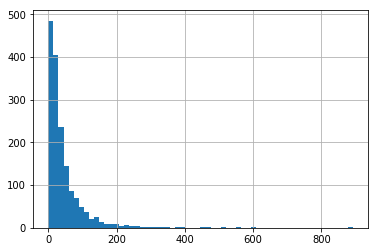

In [12]:
%matplotlib inline

films_df['tropeCount'].hist(bins=60)

We seem to have quite a few films with zero tropes listed. Which ones would those be?

In [14]:
zeroTropeFilms = films_df[films_df['tropeCount'] == 0]
zeroTropeFilms

,Unnamed: 0,name,tvTropesAddress,tropeCount,runTime
26,26,Iron Sky The Coming Race,http://tvtropes.org/pmwiki/pmwiki.php/Film/Iro...,0,0
88,88,Alien Raiders,http://tvtropes.org/pmwiki/pmwiki.php/Film/Ali...,0,0
89,89,Alien Seige,http://tvtropes.org/pmwiki/pmwiki.php/Film/Ali...,0,0
92,92,Area 51,http://tvtropes.org/pmwiki/pmwiki.php/Film/Area51,0,0
127,127,Mars Needs Women,http://tvtropes.org/pmwiki/pmwiki.php/Film/Mar...,0,0
160,160,Aurora,http://tvtropes.org/pmwiki/pmwiki.php/Film/Aurora,0,0
205,205,Repli Kate,http://tvtropes.org/pmwiki/pmwiki.php/Film/Rep...,0,0
209,209,Earth II,http://tvtropes.org/pmwiki/pmwiki.php/Film/Ear...,0,0
444,444,The Bridges At Toko Ri,http://tvtropes.org/pmwiki/pmwiki.php/Film/The...,0,0
448,448,Castle Keep,http://tvtropes.org/pmwiki/pmwiki.php/Film/Cas...,0,0


A quick check of some of these films/pages along with some Google-Fu brings up an interesting problem. Some films, and thus quite likely all other pieces of media, either don't have a page, or are listed within the trope page itself but not the media item's page.

For a truly accurate count, we're going to have to scrape data from the trope pages as well and map out the relationships between the media items and tropes. I'll probably do that with a proper webcrawling library (Scrapy comes to mind) and a graph database (most likely Neo4J). That is starting to go out of scope for this initial analysis so we'll go ahead for now with the data we have and do the fancy web-crawling and graph database set up another time.

Next: Get data from the IMDB API.

This turns out to be a bit more complicated than expected as there isn't an API. IMDB have their data available via file mirrors (until mid December 2017) or download via Amazon S3 Buckets. 

I downloaded the run times file from the one of the file mirrors and used the [IMDB File Processor module](https://github.com/hyounesy/IMDBFileProcessor) to read the data.

In [2]:
#some shenanigans to be able to import files in the modules subfolder without any further trouble
import os
import sys
module_path = os.path.abspath(os.path.join('./modules'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from IMDBFileProcessor import IMDBFileProcessor

In [4]:
dataPath = './data/'
output_path = './'

processor = IMDBFileProcessor(dataPath)
processor.read_movies()
processor.read_length()
processor.read_genres()
processor.read_mpaa()
#processor.read_
#keys= processor.all_keys
#thing = processor.movies
#print(keys)
#print(thing)
processor.save_to_table('movieLengths.txt', save_properties=[IMDBFileProcessor.key_length], ignore_movie_genres=['Adult'])
#processor.save_to_table('movieLengths.txt', save_properties=[[key for key in IMDBFileProcessor.all_keys if key not in [IMDBFileProcessor.key_mpaa_reason]]])


Processing: ./data/movies.list
[done]
Added 1436461 titles.
Skipped 3275536 series/tv shows.

Processing: ./data/running-times.list
[done]
Added length info to 893651 movies.
Skipped 574110 records for titles not found
Skipped 48294 duplicate records.

Processing: ./data/genres.list
[done]
Added genere to 1324567 movies.
Skipped 222849 records for titles not found
Genre distribution summary:
[('Short', 676056), ('Drama', 385939), ('Comedy', 258948),
('Documentary', 240864), ('Adult', 81680), ('Thriller', 78063),
('Action', 75486), ('Romance', 73068), ('Music', 62161), ('Horror',
61855), ('Animation', 56070), ('Family', 51010), ('Crime', 48745),
('Adventure', 43949), ('Fantasy', 41876), ('Sci-Fi', 37340),
('Mystery', 34640), ('Biography', 29091), ('History', 24711),
('Sport', 22553), ('Musical', 20046), ('War', 17755), ('Western',
15721), ('News', 11369), ('Reality-TV', 4192), ('Talk-Show', 2623),
('Film-Noir', 907), ('Game-Show', 794), ('Reality-tv', 42),
('Hardcore', 1), ('Sex', 1), 